In [1]:
%%bash
# Install micromamba (tiny conda)
wget -qO- https://micromamba.snakepit.net/api/micromamba/linux-64/latest | tar -xvj bin/micromamba

# Set base directory
PREFIX=/content/micromamba

# Create Python 3.10 environment
./bin/micromamba create -y -p $PREFIX/envs/pycaret python=3.10

# Initialize micromamba for this shell
source $PREFIX/etc/profile.d/micromamba.sh

# Activate environment
micromamba activate $PREFIX/envs/pycaret

# Alias python
echo "alias pyc='$PREFIX/envs/pycaret/bin/python'" >> ~/.bashrc

# Source aliases
source ~/.bashrc

# Verify Python version
$PREFIX/envs/pycaret/bin/python --version


bin/micromamba
conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache


Transaction

  Prefix: /content/micromamba/envs/pycaret

  Updating specs:

   - python=3.10


  Package               Version  Build               Channel           Size
─────────────────────────────────────────────────────────────────────────────
  Install:
─────────────────────────────────────────────────────────────────────────────

  + _libgcc_mutex           0.1  conda_forge         conda-forge     Cached
  + _openmp_mutex           4.5  2_gnu               conda-forge     Cached
  + bzip2                 1.0.8  hda65f42_8          conda-forge     Cached
  + ca-certificates   2025.10.5  hbd8a1cb_0          conda-forge     Cached
  + ld_impl_linux-64       2.44  h1aa0949_4          conda-forge     Cached
  + libexpat              2.7.1  hecca717_0          conda-forge     Cached
  + libffi                3.5.2  h9ec8514_0 

bash: line 11: /content/micromamba/etc/profile.d/micromamba.sh: No such file or directory
bash: line 14: micromamba: command not found


In [2]:
%%bash
PREFIX=/content/micromamba

# Activate environment
source $PREFIX/etc/profile.d/micromamba.sh || true
$PREFIX/bin/micromamba activate $PREFIX/envs/pycaret

# Install core dependencies
$PREFIX/envs/pycaret/bin/pip install -q numpy==1.23.5 scipy==1.10.1 scikit-learn==1.1.3
$PREFIX/envs/pycaret/bin/pip install -q numba==0.56.4 llvmlite==0.39.1

# Install ML libs
$PREFIX/envs/pycaret/bin/pip install -q xgboost==1.6.2 lightgbm==3.3.5 catboost==1.2.2

# Install PyCaret
$PREFIX/envs/pycaret/bin/pip install -q pycaret==3.2.0

# Verify
$PREFIX/envs/pycaret/bin/python - << 'EOF'
import sys, numpy, sklearn
from pycaret.utils import version
print("Python:", sys.version)
print("numpy:", numpy.__version__)
print("sklearn:", sklearn.__version__)
print("pycaret:", version())
EOF

nvidia-smi


Python: 3.10.19 | packaged by conda-forge | (main, Oct 22 2025, 22:29:10) [GCC 14.3.0]
numpy: 1.23.5
sklearn: 1.1.3
pycaret: 3.2.0
Sun Nov  2 13:58:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|        

bash: line 4: /content/micromamba/etc/profile.d/micromamba.sh: No such file or directory
bash: line 5: /content/micromamba/bin/micromamba: No such file or directory


In [6]:
# Activate the PyCaret env first inside Colab Python
import os, sys
PREFIX = "/content/micromamba"
os.environ["PYTHONPATH"] = f"{PREFIX}/envs/pycaret/lib/python3.10/site-packages"
python_exec = f"{PREFIX}/envs/pycaret/bin/python"

print("Using Python:", python_exec)

from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer(as_frame=True)
df = data.frame

df['target'] = df['target'].map({0: 'malignant', 1: 'benign'})  # convert to labels

print("Dataset shape:", df.shape)
df.head()

Using Python: /content/micromamba/envs/pycaret/bin/python
Dataset shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [9]:
%%bash
source /content/micromamba/etc/profile.d/micromamba.sh
micromamba activate /content/micromamba/envs/pycaret
echo "✅ micromamba activated"
which python
python --version


✅ micromamba activated
/usr/local/bin/python
Python 3.12.12


bash: line 1: /content/micromamba/etc/profile.d/micromamba.sh: No such file or directory
bash: line 2: micromamba: command not found


In [11]:
%%bash
cd /content
wget -q https://micromamba.snakepit.net/api/micromamba/linux-64/latest -O micromamba.tar.bz2
tar -xvjf micromamba.tar.bz2
mkdir -p /content/micromamba
mv bin/micromamba /content/micromamba/


info/files
info/has_prefix
info/index.json
info/test/run_test.sh
info/hash_input.json
info/paths.json
info/recipe/C_ARES_LICENSE.txt
info/licenses/C_ARES_LICENSE.txt
info/recipe/conda_build_config.yaml
info/licenses/REPROC_LICENSE.txt
info/recipe/REPROC_LICENSE.txt
info/licenses/NLOHMANN_JSON_LICENSE.txt
info/recipe/NLOHMANN_JSON_LICENSE.txt
info/recipe/CURL_LICENSE.txt
info/licenses/CURL_LICENSE.txt
info/recipe/CPP_FILESYSTEM_LICENSE.txt
info/recipe/ZLIB_LICENSE.txt
info/licenses/ZLIB_LICENSE.txt
info/licenses/LIBNGHTTP2_LICENSE.txt
info/recipe/LIBNGHTTP2_LICENSE.txt
info/licenses/LIBLZ4_LICENSE.txt
info/recipe/LIBLZ4_LICENSE.txt
info/recipe/SPDLOG_LICENSE.txt
info/licenses/SPDLOG_LICENSE.txt
info/licenses/FMT_LICENSE.txt
info/recipe/FMT_LICENSE.txt
info/licenses/LIBSOLV_LICENSE.txt
info/recipe/LIBSOLV_LICENSE.txt
info/licenses/mamba/LICENSE
info/recipe/build.sh
info/licenses/ZSTD_LICENSE.txt
info/recipe/TERMCOLOR_CPP_LICENSE.txt
info/recipe/ZSTD_LICENSE.txt
info/recipe/recipe-scripts

In [12]:
%%bash
/content/micromamba/micromamba create -y -p /content/pycaret_env python=3.10


conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache


Transaction

  Prefix: /content/pycaret_env

  Updating specs:

   - python=3.10


  Package               Version  Build               Channel           Size
─────────────────────────────────────────────────────────────────────────────
  Install:
─────────────────────────────────────────────────────────────────────────────

  + _libgcc_mutex           0.1  conda_forge         conda-forge     Cached
  + _openmp_mutex           4.5  2_gnu               conda-forge     Cached
  + bzip2                 1.0.8  hda65f42_8          conda-forge     Cached
  + ca-certificates   2025.10.5  hbd8a1cb_0          conda-forge     Cached
  + ld_impl_linux-64       2.44  h1aa0949_4          conda-forge     Cached
  + libexpat              2.7.1  hecca717_0          conda-forge     Cached
  + libffi                3.5.2  h9ec8514_0          conda-forge     Ca

In [13]:
%%bash
/content/micromamba/micromamba run -p /content/pycaret_env pip install pycaret[full]


INFO: pip is looking at multiple versions of dash-bootstrap-components to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of fugue to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of fugue[dask] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of gradio to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of gradio to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pyp

  DEPRECATION: Building 'fugue-sql-antlr' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'fugue-sql-antlr'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  DEPRECATION: Building 'dash-cytoscape' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'dash-cytoscape'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  DEPRECATION: Building 'htmlmin' using the legacy set

In [14]:
%%bash
/content/micromamba/micromamba run -p /content/pycaret_env python - << 'EOF'
import pycaret
print("PyCaret OK ✅ Version:", pycaret.__version__)
EOF


PyCaret OK ✅ Version: 3.2.0


In [17]:
%%bash
/content/micromamba/micromamba run -p /content/pycaret_env pip install "joblib==1.2.0" "scikit-learn==1.2.2"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 97.5 MB/s  0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.2
    Uninstalling joblib-1.5.2:
      Successfully uninstalled joblib-1.5.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3



In [26]:
%%bash
rm -rf /content/pycaret_env


In [27]:
%%bash
/content/micromamba/micromamba create -y -p /content/pycaret_env python=3.8


conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache


Transaction

  Prefix: /content/pycaret_env

  Updating specs:

   - python=3.8


  Package               Version  Build               Channel           Size
─────────────────────────────────────────────────────────────────────────────
  Install:
─────────────────────────────────────────────────────────────────────────────

  + _libgcc_mutex           0.1  conda_forge         conda-forge     Cached
  + _openmp_mutex           4.5  2_gnu               conda-forge     Cached
  + bzip2                 1.0.8  hda65f42_8          conda-forge     Cached
  + ca-certificates   2025.10.5  hbd8a1cb_0          conda-forge     Cached
  + ld_impl_linux-64       2.44  h1aa0949_4          conda-forge     Cached
  + libffi                3.5.2  h9ec8514_0          conda-forge     Cached
  + libgcc               15.2.0  h767d61c_7          conda-forge     Cac

In [30]:
%%bash
/content/micromamba/micromamba run -p /content/micromamba/envs/pycaret pip install pycaret==3.2.0


  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached importlib_metadata-8.7.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached markupsafe-3.0.3-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (2.7 kB)
  Using cached numba-0.62.1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.8 kB)
  Using cached plotly-6.3.1-py3-none-any.whl.metadata (8.5 kB)
  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached pillow-12.0.0-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (8.8 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached numpy-1.25.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.w

In [31]:
%%bash
/content/micromamba/micromamba run -p /content/micromamba/envs/pycaret pip install scikit-learn==1.1.3 numpy==1.23.5


  Using cached scikit_learn-1.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached scikit_learn-1.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.5 MB)
Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2



In [33]:
%%bash
/content/micromamba/micromamba run -p /content/micromamba/envs/pycaret pip install "joblib<1.3"


  Using cached joblib-1.2.0-py3-none-any.whl.metadata (5.3 kB)
Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.2
    Uninstalling joblib-1.5.2:
      Successfully uninstalled joblib-1.5.2


In [34]:
%%bash
/content/micromamba/micromamba run -p /content/micromamba/envs/pycaret python - <<EOF
from pycaret.classification import *
print("✅ PyCaret import working!")
EOF


✅ PyCaret import working!


In [35]:
%%bash
/content/micromamba/micromamba run -p /content/micromamba/envs/pycaret python - <<EOF
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer(as_frame=True)
df = data.frame

# Rename target column to 'target' (PyCaret expects it clean)
df['target'] = df['target'].map({0:"malignant", 1:"benign"})

print("✅ Data loaded | Shape:", df.shape)
print(df.head())
EOF


✅ Data loaded | Shape: (569, 31)
   mean radius  mean texture  ...  worst fractal dimension     target
0        17.99         10.38  ...                  0.11890  malignant
1        20.57         17.77  ...                  0.08902  malignant
2        19.69         21.25  ...                  0.08758  malignant
3        11.42         20.38  ...                  0.17300  malignant
4        20.29         14.34  ...                  0.07678  malignant

[5 rows x 31 columns]


In [37]:
%%bash
/content/micromamba/micromamba run -p /content/micromamba/envs/pycaret python - <<EOF
from pycaret.classification import *
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load data
data = load_breast_cancer(as_frame=True)
df = data.frame
df['target'] = df['target'].map({0:"malignant", 1:"benign"})

# ✅ PyCaret 2 syntax — no "silent", no "html"
clf = setup(
    data=df,
    target="target",
    session_id=42,
    normalize=True
)

print("✅ PyCaret setup complete")
print(pull().head())
EOF


                    Description                    Value
0                    Session id                       42
1                        Target                   target
2                   Target type                   Binary
3                Target mapping  benign: 0, malignant: 1
4           Original data shape                (569, 31)
5        Transformed data shape                (569, 31)
6   Transformed train set shape                (398, 31)
7    Transformed test set shape                (171, 31)
8              Numeric features                       30
9                    Preprocess                     True
10              Imputation type                   simple
11           Numeric imputation                     mean
12       Categorical imputation                     mode
13                    Normalize                     True
14             Normalize method                   zscore
15               Fold Generator          StratifiedKFold
16                  Fold Number

In [39]:
%%bash
/content/micromamba/micromamba run -p /content/micromamba/envs/pycaret python - <<EOF
from pycaret.classification import setup, compare_models, pull
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset again
data = load_breast_cancer(as_frame=True)
df = data.frame
df["target"] = df["target"].map({0:"malignant", 1:"benign"})

# Setup
setup(data=df, target="target", session_id=42, normalize=True)

# Compare models
best = compare_models()

print("✅ Best model selected:")
print(best)

# Show leaderboard
print("\n🏆 Leaderboard:")
print(pull())
EOF



                    Description                    Value
0                    Session id                       42
1                        Target                   target
2                   Target type                   Binary
3                Target mapping  benign: 0, malignant: 1
4           Original data shape                (569, 31)
5        Transformed data shape                (569, 31)
6   Transformed train set shape                (398, 31)
7    Transformed test set shape                (171, 31)
8              Numeric features                       30
9                    Preprocess                     True
10              Imputation type                   simple
11           Numeric imputation                     mean
12       Categorical imputation                     mode
13                    Normalize                     True
14             Normalize method                   zscore
15               Fold Generator          StratifiedKFold
16                  Fold Number

In [40]:
%%bash
/content/micromamba/micromamba run -p /content/micromamba/envs/pycaret python - <<EOF
from pycaret.classification import *
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer(as_frame=True)
df = data.frame
df["target"] = df["target"].map({0:"malignant", 1:"benign"})

setup(data=df, target="target", session_id=42, normalize=True)

best = compare_models()
model = create_model(best)

print("✅ Model created successfully")
print(model)
EOF


                    Description                    Value
0                    Session id                       42
1                        Target                   target
2                   Target type                   Binary
3                Target mapping  benign: 0, malignant: 1
4           Original data shape                (569, 31)
5        Transformed data shape                (569, 31)
6   Transformed train set shape                (398, 31)
7    Transformed test set shape                (171, 31)
8              Numeric features                       30
9                    Preprocess                     True
10              Imputation type                   simple
11           Numeric imputation                     mean
12       Categorical imputation                     mode
13                    Normalize                     True
14             Normalize method                   zscore
15               Fold Generator          StratifiedKFold
16                  Fold Number

In [41]:
%%bash
/content/micromamba/micromamba run -p /content/micromamba/envs/pycaret python - <<EOF
from pycaret.classification import *
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer(as_frame=True)
df = data.frame
df["target"] = df["target"].map({0:"malignant", 1:"benign"})

# Setup & model recreate
setup(data=df, target="target", session_id=42, normalize=True)
best = compare_models()
model = create_model(best)

# Tune model
tuned_model = tune_model(model)

print("✅ Model tuned successfully")
print(tuned_model)

# Show tuning results
print("\n📊 Tuning Results:")
print(pull())
EOF


                    Description                    Value
0                    Session id                       42
1                        Target                   target
2                   Target type                   Binary
3                Target mapping  benign: 0, malignant: 1
4           Original data shape                (569, 31)
5        Transformed data shape                (569, 31)
6   Transformed train set shape                (398, 31)
7    Transformed test set shape                (171, 31)
8              Numeric features                       30
9                    Preprocess                     True
10              Imputation type                   simple
11           Numeric imputation                     mean
12       Categorical imputation                     mode
13                    Normalize                     True
14             Normalize method                   zscore
15               Fold Generator          StratifiedKFold
16                  Fold Number

In [48]:
%%bash
/content/micromamba/micromamba run -p /content/micromamba/envs/pycaret python << 'EOF'
from pycaret.classification import *
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer(as_frame=True)
df = data.frame
df["target"] = df["target"].map({0:"malignant", 1:"benign"})

# Setup
setup(data=df, target="target", session_id=42, normalize=True, html=False)

# Train best model + tune
best = compare_models()
model = create_model(best)
tuned_model = tune_model(model)

print("✅ Model tuned successfully")

# Export predictions + model
preds = predict_model(tuned_model)
preds.to_csv("/content/predictions.csv", index=False)
save_model(tuned_model, "/content/breast_cancer_model")

print("✅ Model + predictions saved ✅")
EOF


                    Description                    Value
0                    Session id                       42
1                        Target                   target
2                   Target type                   Binary
3                Target mapping  benign: 0, malignant: 1
4           Original data shape                (569, 31)
5        Transformed data shape                (569, 31)
6   Transformed train set shape                (398, 31)
7    Transformed test set shape                (171, 31)
8              Numeric features                       30
9                    Preprocess                     True
10              Imputation type                   simple
11           Numeric imputation                     mean
12       Categorical imputation                     mode
13                    Normalize                     True
14             Normalize method                   zscore
15               Fold Generator          StratifiedKFold
16                  Fold Number

In [49]:
import pandas as pd

preds = pd.read_csv("/content/predictions.csv")
preds.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,prediction_label,prediction_score
0,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.029250,0.1473,0.05746,...,830.5,0.10890,0.26490,0.37790,0.09594,0.2471,0.07463,benign,benign,0.8086
1,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,0.1555,0.06048,...,562.6,0.12890,0.13520,0.04506,0.05093,0.2880,0.08083,benign,benign,0.9930
2,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.000000,0.1587,0.05884,...,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039,benign,benign,0.9997
3,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.024800,0.1714,0.06340,...,471.4,0.13690,0.14820,0.10670,0.07431,0.2998,0.07881,benign,benign,0.9909
4,12.75,16.70,82.51,493.8,0.11250,0.11170,0.03880,0.029950,0.2120,0.06623,...,624.1,0.14750,0.19790,0.14230,0.08045,0.3071,0.08557,benign,benign,0.9544


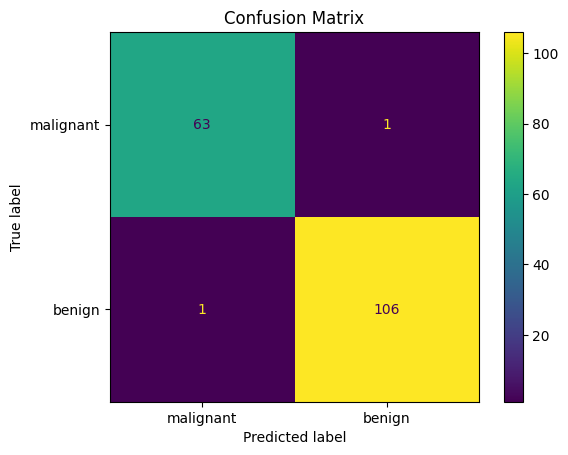

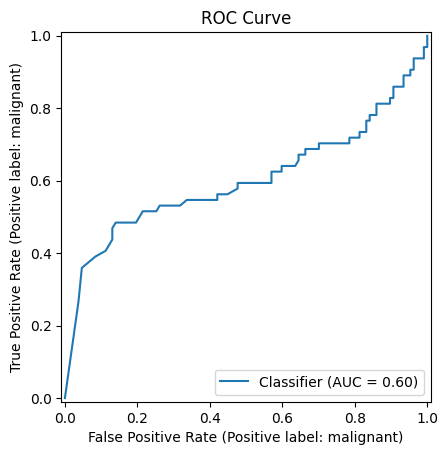

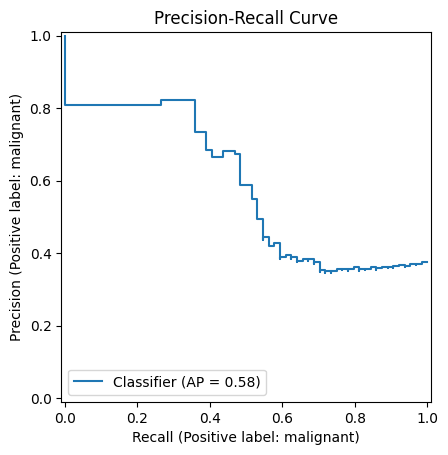

AUC Score: 0.6024


In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt
import pandas as pd

preds = pd.read_csv("/content/predictions.csv")
y_true = preds["target"]
y_pred = preds["prediction_label"]
y_prob = preds["prediction_score"]

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=["malignant","benign"])
disp = ConfusionMatrixDisplay(cm, display_labels=["malignant","benign"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
import pandas as pd

preds = pd.read_csv("/content/predictions.csv")

y_true = preds["target"]
y_pred = preds["prediction_label"]
y_prob = preds["prediction_score"]  # probability for malignant class

# because labels are strings, specify positive class
pos_label = "malignant"

# ✅ ROC Curve
RocCurveDisplay.from_predictions(y_true, y_prob, pos_label=pos_label)
plt.title("ROC Curve")
plt.show()

# ✅ Precision-Recall Curve
PrecisionRecallDisplay.from_predictions(y_true, y_prob, pos_label=pos_label)
plt.title("Precision-Recall Curve")
plt.show()

# ✅ AUC Score
auc = roc_auc_score((y_true == pos_label), y_prob)
print(f"AUC Score: {auc:.4f}")

